### Predicting Heart Disease—KNN Classification Algorithm
 **Project Proposal**
 > Michelle Ho (2023)

In [1]:
library(tidyverse)
library(tidyr)
library(ggplot2)
library(tidymodels)
library(dplyr)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Introduction:**
> One of the leading causes of death in Hungary are cardiovascular diseases (CVDs) (OECD and WHO, 2017). It constitutes approximately 52.4% of the main diagnoses underlying cause of death and 47.6% of the secondary diagnoses prior to death. Several risk factors are known to be associated with CVDs; the most prominent among them are high blood pressure, high cholesterol levels, and smoking (CDC, 2022). Moreover, susceptibility to heart disease increases with age and other uncontrollable factors such as sex (McLaren, 2023).

> As data science becomes progressively useful in analyzing and interpreting patient outcomes, we plan to use the tools that we’ve learnt in class to predict the angiographic disease status of CVDs. Our project will use the Heart Disease data set from the UCI Machine Learning Repository to build a classification model that will predict CVD diagnoses in presenting patients. The diagnosis of heart disease in the data set is defined as a binary label, whether the patient has the disease or not. The disease is present if there is greater than 50% diameter narrowing of any major blood vessels in a patient. Ie., if the value in the num parameter is 1, then more than 50% of the diameter of the major blood vessels are narrowing (Hungarian Institute of Cardiology, 1988). When blood vessels narrow, the heart does not receive the blood that it requries and thus, is considered heart disease. Overall, heart failure is a common result caused by CVDs. The dataset that we will be using features 14 attributes that will be examined to determine which are possible indicators of heart disease which will then be used to predict the presence of heart disease in patients.

**Preliminary exploratory data analysis:**

In [2]:
# setting the seed such that the numbers used in the analysis are reasonably random
set.seed(3789)

In [3]:
# loading the data and mutating the class label column to factor 
heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", 
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak", 
                                        "slope", "ca", "thal", "num"))

# changing any "?" to NA in our dataset
heart_disease_data[heart_disease_data=="?"]<-NA

# converting columns to correct type (mutate_if mutates columns based on provided conditions; mutate_at allows to mutate multiple columns to the same type)
heart_disease_data <- heart_disease_data |> mutate_if(is.character, as.numeric) |> mutate_at(vars("sex", "cp", "fbs", "restecg", "exang", "ca", "thal", "num", "slope"), factor)
heart_disease_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


In [4]:
# partitioning the data into a training (75%) and testing (25%) set; num will be used as the class label
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)

heart_disease_train <- training(heart_disease_split)
heart_disease_train

heart_disease_test <- testing(heart_disease_split)
heart_disease_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
54,0,3,130,294,0,1,100,1,0,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,4,160,291,0,1,158,1,3.0,2,NA,NA,1
52,1,4,160,331,0,0,94,1,2.5,NA,NA,NA,1
56,1,4,155,342,1,0,150,1,3.0,2,NA,NA,1


In [5]:
# identifying the proportion of cases with a diagnosis of heart disease (positive angiographic disease status) and the proportion without in the full data
# set and the training data set to ensure that the proportions are preserved during the split
heart_disease_data_proportions <- heart_disease_data |>
                      group_by(diagnosis = num) |>
                      summarize(people = n()) |>
                      mutate(percent = 100*people/nrow(heart_disease_data))
heart_disease_data_proportions

heart_disease_train_proportions <- heart_disease_train |>
                      group_by(diagnosis = num) |>
                      summarize(people = n()) |>
                      mutate(percent = 100*people/nrow(heart_disease_train))
heart_disease_train_proportions

# those that have a heart disease diagnoses have a num value of 1, indicating that there is more than 50% blood vessels diameter narrowing
# those that do not have a heart disease diagnoses have a num value of 0, indicating that there is more than 50% blood vessels diameter narrowing

diagnosis,people,percent
<fct>,<int>,<dbl>
0,188,63.94558
1,106,36.05442


diagnosis,people,percent
<fct>,<int>,<dbl>
0,141,64.09091
1,79,35.90909


**Exploratory data analysis using training data:**

In [6]:
# table that reports the number of observations in each class
heart_disease_class_observations <- heart_disease_train |>
                      group_by(diagnosis = num) |>
                      summarize(people = n())
heart_disease_class_observations

diagnosis,people
<fct>,<int>
0,141
1,79


In [7]:
# table that summarizes the training data with the mean, min, and max of the numerical variables
heart_train_summary <- heart_disease_train |>
  summarise(across(
    c(age, trestbps, chol, thalach, oldpeak),
    list(mean = mean, min = min, max = max),
    na.rm = TRUE
  )) |> pivot_longer (everything(), names_to="variable", values_to="value") |> 
 separate(variable, into = c("variable", "statistics"), sep = "_") |> pivot_wider(names_from = statistics, values_from = value)
heart_train_summary

# the number of rows have missing data, at least one NA in the observation
tibble(missing_data = nrow(heart_disease_train[!complete.cases(heart_disease_train),]))

variable,mean,min,max
<chr>,<dbl>,<dbl>,<dbl>
age,48.1090909,28,65
trestbps,132.3287671,92,180
chol,248.9365854,85,603
thalach,139.4155251,82,190
oldpeak,0.5877273,0,5


missing_data
<int>
220


Warning message:
“Removed 16 rows containing missing values (geom_point).”


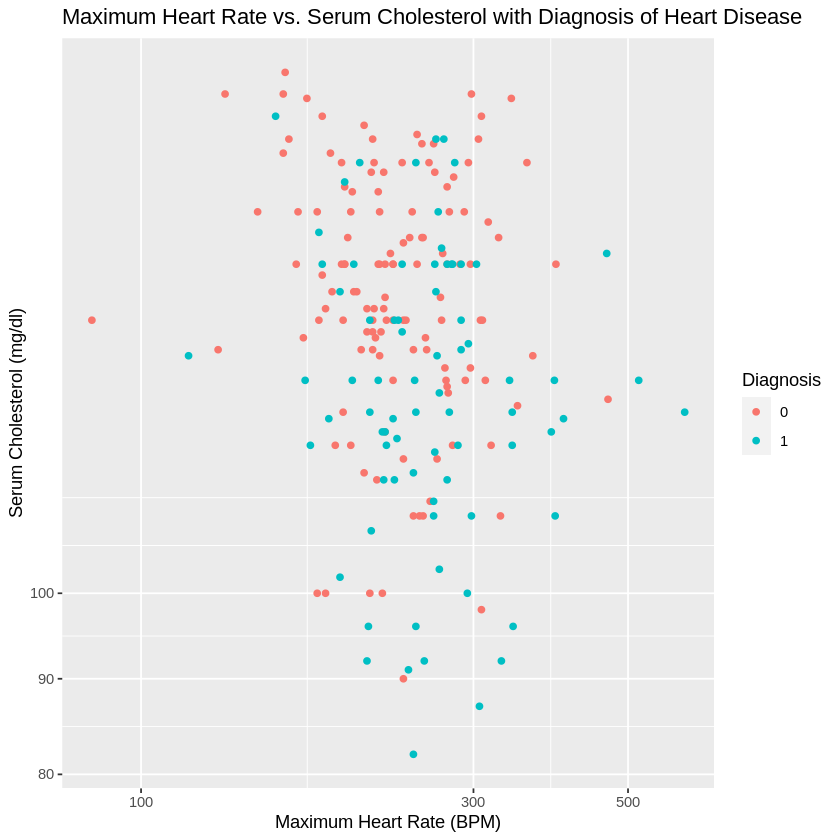

In [8]:
# scatterplot of the predictor variables maximum heart rate (BPS) and serum cholesterol (mg/dl) with diagnosis clustering identification
# variables were chosen from correlation analysis
ggplot(heart_disease_train, aes(x = chol, y = thalach, color = num)) +
    geom_point() +
    labs(x = "Maximum Heart Rate (BPM)", y = "Serum Cholesterol (mg/dl)", colour = "Diagnosis") +
    theme(text = element_text(size = 11)) +
    scale_x_log10(labels = comma) +
    scale_y_log10(labels = comma) +
    ggtitle("Maximum Heart Rate vs. Serum Cholesterol with Diagnosis of Heart Disease")

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


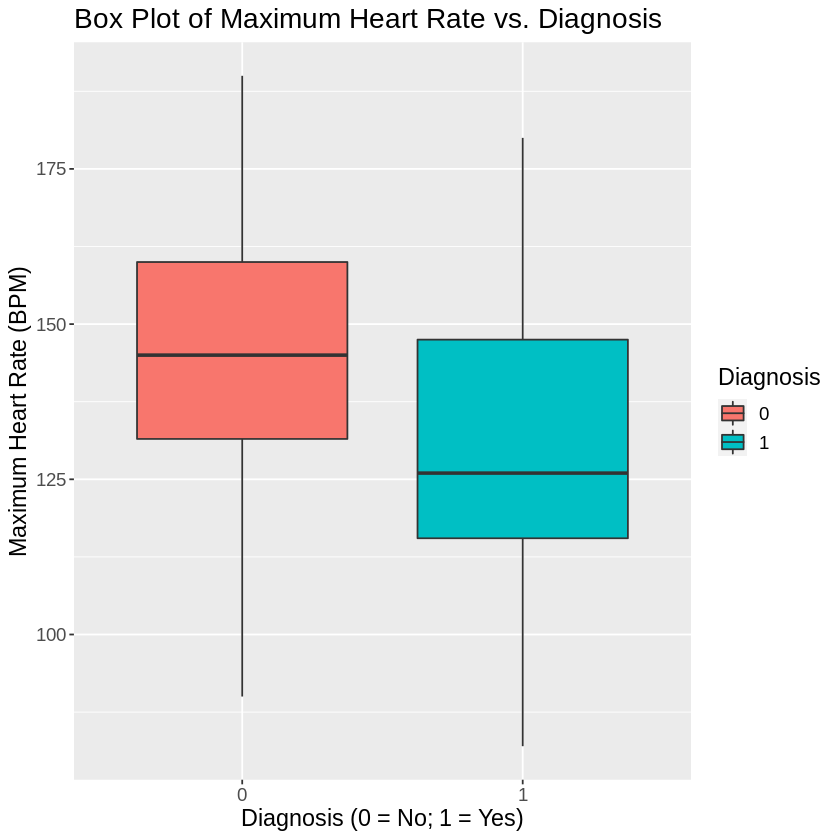

In [9]:
# box plot of the maximum heart rate (BPS) in categories of heart disease diagnosis
heart_disease_train <- heart_disease_train |> mutate_if(is.character, as.numeric) |> mutate_at(vars("sex", "cp", "fbs", "restecg", "exang", "ca", "thal", "num", "slope"), factor)
ggplot(heart_disease_train, aes(x = num, y = thalach, fill = factor(num))) +
  geom_boxplot() +
  labs(x = "Diagnosis (0 = No; 1 = Yes)", y = "Maximum Heart Rate (BPM)", 
       title = "Box Plot of Maximum Heart Rate vs. Diagnosis",
       fill = "Diagnosis") +
  theme(text = element_text(size = 14)) +
  guides(fill = guide_legend(title = "Diagnosis"))

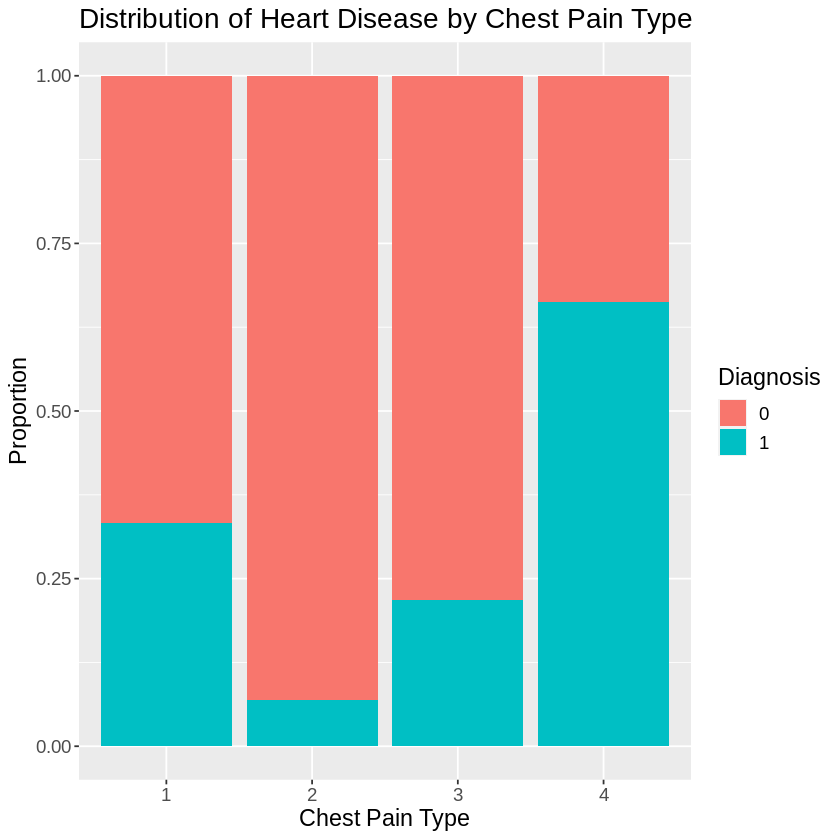

In [10]:
# bar plot of the proportions of heart disease by type of chest pain 
ggplot(heart_disease_train, aes(x = cp, fill = factor(num))) + 
  geom_bar(position = "fill") +
  labs(x = "Chest Pain Type", y = "Proportion",
       fill = "Disease Status",
       title = "Distribution of Heart Disease by Chest Pain Type") +
       theme(text = element_text(size = 14)) +
       guides(fill = guide_legend(title = "Diagnosis"))

**Methods:**

> To determine which variables are suitable for classifying angiographic disease status, we decided to implement correlation analysis. First, we performed one-hot encoding on our categorical variables to create new columns that contain numerical variables representing those categorical ones. The relationship of these variables between one another were calculated using the cor function and mapped into a correlation matrix (pearson correlation coefficient).

> Subsequently, the correlation matrix was then converted into a dataframe and the last column was selected. This column shows the correlation between each variable to the label that we are trying to predict, heart disease angiographic disease status. It was arranged in descending order to determine which variables have the greatest correlation to num1 (absolute values were used to negate the correlation direction). The resulting dataframe allowed us to identify the best predictors for our analysis: the variables that appear at the data frame. We decided to use the top five categorical variables: exang0, slope, slope2, cp4, thal3; and the top two numerical variables: thalach and chol as our predictors.

> We vizualized the results using a scatter plot of our two numerical variables, thalach and chol, since this allows for a concise 2D representation. Moreover, a box plot and bar graph were used to represent the relationship between the categorical variables and the label.

> Note: exang1 was not considered because it’s the same as exang0 (opposite correlation values); moreover, oldpeak was disregarded due to the fact that it's difficult to classify.

In [11]:
options(repr.matrix.max.rows = 25)

# one-hot encoded data
encoded_data <- heart_disease_train |> mutate(sex0 = ifelse(sex=="0",1,0), sex1 = ifelse(sex=="1",1,0),
                      cp1 = ifelse(cp=="1",1,0), cp2 = ifelse(cp=="2",1,0), cp3 = ifelse(cp=="3",1,0), cp4 = ifelse(cp=="4",1,0), 
                      fbs0 = ifelse(fbs=="0",1,0), sex1 = ifelse(fbs=="1",1,0),
                      restecg0 = ifelse( restecg=="0",1,0), rectecg1 = ifelse(restecg=="1",1,0), restecg2 = ifelse(restecg=="2",1,0),
                      exang0 = ifelse(exang=="0",1,0), exang1 = ifelse(exang=="1",1,0),
                      slope1 = ifelse(slope=="1",1,0), slope2 = ifelse(slope=="2",1,0), slope3 = ifelse(slope=="3",1,0),
                      thal3 = ifelse(thal=="3",1,0), thal6 = ifelse(thal=="6",1,0), thal7 = ifelse(thal=="7",1,0),
                      num0 = ifelse(num=="0",1,0), num1 = ifelse(num=="1",1,0)) |> select(-where(is.factor)) # removing all factor coloumns from the dataframe
matrix <- cor(encoded_data, use = "pairwise.complete.obs") # creating a correlation matrix based on the above dataframe and ignoring the NA
num_df <- data.frame(matrix[,25]) # selecting the 25th coloumn of the matrix as a dataframe
num_df <- num_df |> arrange(desc(abs(num_df))) # arranging the 25th column in a descending order based on absolute value to only account for the strength of the relationship and not the direction
num_df

Warning message in cor(encoded_data, use = "pairwise.complete.obs"):
“the standard deviation is zero”


,matrix...25.
,<dbl>
num0,-1.000000000
num1,1.000000000
exang0,-0.604936038
exang1,0.604936038
slope1,-0.592220092
slope2,0.547559811
cp4,0.537148449
thal3,-0.521050106
oldpeak,0.506800915


**Expected outcomes and significance:**
> We expect to find that this model will predict the num variable to a relatively high and satisfactory level of accuracy, depending on the chosen KNN. Due to the exploratory data analysis that we performed, the categorical and numerical variables with most correlation to disease status were identified as the best predictors.

> Such findings and the model itself could potentially aid hospitals in identifying patients with heart disease risk by performing simple tests such as measuring their maximum heart rate or cholesterol levels. This model may minimize the time that doctors spend on ruling out a conclusive diagnosis on their own and relieve any difficulty associated with such prediction problems. Moreover, the findings identify the main factors that are correlated to heart disease which is useful information in determining preventative measures against heart disease that can be publicly disseminated.

> Lastly, these findings may lead to future research questions that explore the biological mechanisms underlying the relationships between heart disease status and the predictors. It also raises questions about whether this model can be applied to different geographical locations; ie., how well does the model generalize to other populations and datasets?

**References**

CDC: Centers for Disease Control and Prevention. (2022). Heart Disease and Stroke.
https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.

Hungarian Institute of Cardiology. (1988). Heart Disease Data Set [Dataset]. UCI Machine Learning 
Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

McLaren. (2023). Heart Disease. 
https://www.mclaren.org/main/heart-disease-risk-factors#:~:text=The%20%22uncontrollable%22%20risk%20factors%20are,and%20common%20lifestyles%20increase%20risk)

OECD and World Health Organization (WHO). (2021). State of health in the EU: Country Health Profile 
2017 - Hungary. https://www.euro.who.int/__data/assets/pdf_file/0006/355983/Health-Profile-Hungary-Eng.pdf